In [2]:
from wordcloud import WordCloud
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from IPython.display import Image
data = pd.read_csv('cleanedTweetText.csv', sep=',', encoding='utf-8')
%matplotlib inline

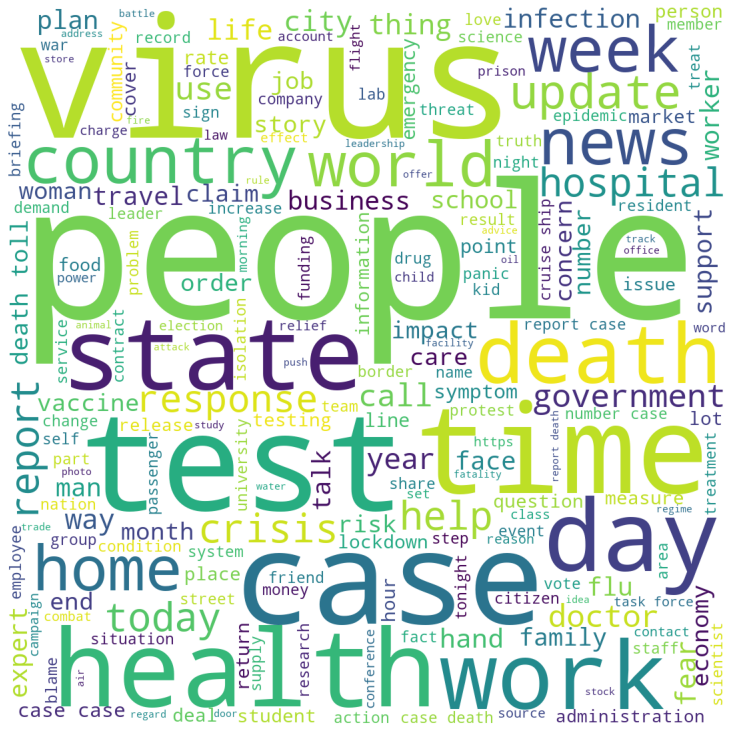

In [12]:
Image('tweetWordCloud.png', width=400, height=400)
# Or exactly this, because this is the wordcloud from the dataset 

In [3]:
data.head()

,Unnamed: 0,PublishDate,Tweets,CleanedTweet
0,0,4/20/20 21:04,"Just across Dutch border, study following 1,00...","['border', 'study', 'people', 'plan', 'deal', ..."
1,1,4/20/20 21:00,North Carolina's top health official said that...,"['health', 'result', 'death', 'state', 'month'..."
2,2,4/20/20 21:00,Millions of Americans & their children were le...,"['child', 'package', 'immigration', 'technical..."
3,3,4/20/20 21:00,All the experts say we need to greatly expand ...,"['expert', 'testing', 'capacity', 'promise', '..."
4,4,4/20/20 21:00,WATCH: The 5 teenage girls on this robotics te...,"['girl', 'team', 'use', 'part', 'ventilator', ..."


In [7]:
cleanlist = []
nlp = spacy.load('en')
wordCloudString = ''


In [8]:
# use this to save on processing power
# for i in range(len(5))
for i in range(len(data)):
    dataAfterLemmaFilter = []
    cleanTweet = data.loc[i, "CleanedTweet"]
    doc = nlp(cleanTweet)

    if cleanTweet != '':
        for token in doc:
            dataAfterLemmaFilter.append(token.lemma_)

        removelist = ['[', ']', '\'', ',']

        for item in dataAfterLemmaFilter:
            if item not in removelist:
                cleanlist.append(item)

In [9]:

for word in cleanlist:
    wordCloudString = wordCloudString + ' ' + word


In [10]:
wordcloud = WordCloud(width=1080, height=1080,
                      background_color='white',
                      min_font_size=10).generate(wordCloudString)


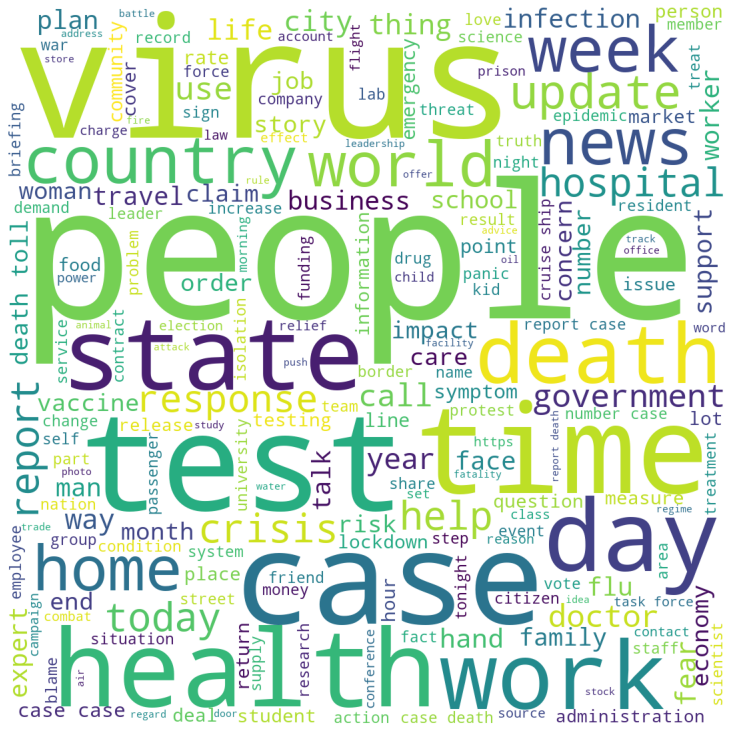

In [11]:
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
